In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
df = pd.read_csv('../data/Pokemon.csv')     

In [3]:
df.sample(9)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
670,609,Chandelure,Ghost,Fire,520,60,55,90,145,90,80,5,False
26,21,Spearow,Normal,Flying,262,40,60,30,31,31,70,1,False
571,512,Simisage,Grass,NaN,498,75,98,63,98,63,101,5,False
66,61,Poliwhirl,Water,NaN,385,65,65,65,50,50,90,1,False
92,85,Dodrio,Normal,Flying,460,60,110,70,60,60,100,1,False
684,623,Golurk,Ground,Ghost,483,89,124,80,55,80,55,5,False
475,428,Lopunny,Normal,NaN,480,65,76,84,54,96,105,4,False
67,62,Poliwrath,Water,Fighting,510,90,95,95,70,90,70,1,False
395,361,Snorunt,Ice,NaN,300,50,50,50,50,50,50,3,False


In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
cdf = df[['HP','Attack','Sp. Atk','Total']]

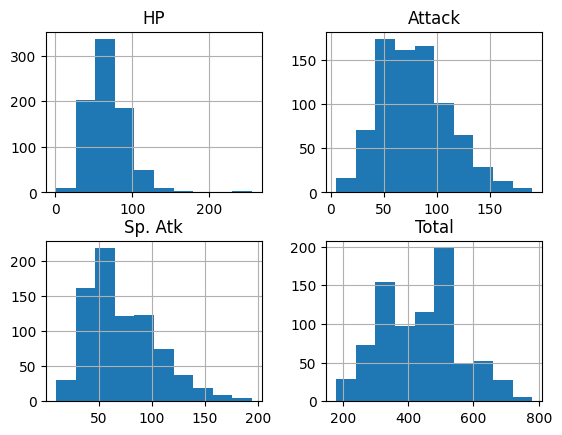

In [6]:
cdf.hist()
plt.show()

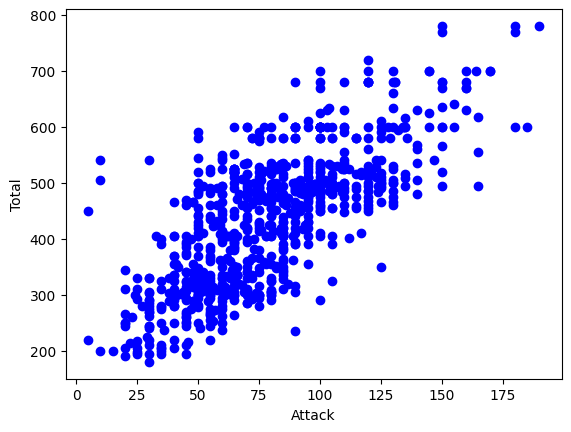

In [7]:
# plot scatter graphs to see linear relationships between target and feature
plt.scatter(cdf['Attack'], cdf['Total'], color='blue')
plt.xlabel("Attack")
plt.ylabel("Total")
plt.show()

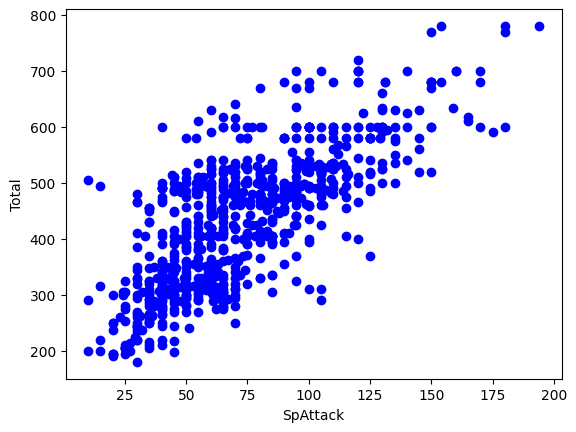

In [8]:
plt.scatter(cdf['Sp. Atk'], cdf['Total'], color='blue')
plt.xlabel("SpAttack")
plt.ylabel("Total")
plt.show()

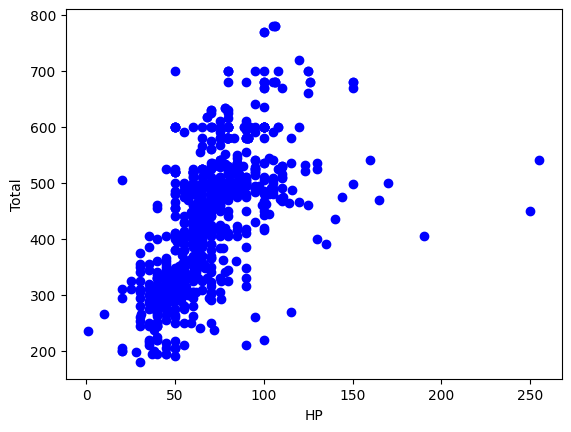

In [9]:
plt.scatter(cdf['HP'], cdf['Total'], color='blue')
plt.xlabel("HP")
plt.ylabel("Total")
plt.show()

In [10]:
# extracting feature and target variables
X = cdf.Attack.to_numpy()
y = cdf.Total.to_numpy()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% test size/ 80% train size

In [12]:
type(X_train), np.shape(X_train), np.shape(y_train)

(numpy.ndarray, (640,), (640,))

In [13]:
from sklearn import linear_model

# creating a model obj
regressionM = linear_model.LinearRegression()

In [14]:
# training the model
regressionM.fit(X_train.reshape(-1, 1), y_train) 

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [15]:
# print coefficient and intercept
print('Coefficient: ', regressionM.coef_[0])
print('Intercept: ', regressionM.intercept_)

Coefficient:  2.723483111906752
Intercept:  217.53093738991717


Text(0, 0.5, 'Total')

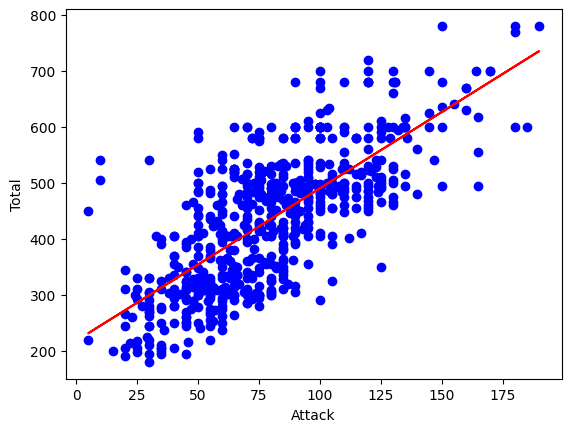

In [16]:
# visualize our model
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressionM.coef_ * X_train + regressionM.intercept_, '-r') 
plt.xlabel("Attack")
plt.ylabel("Total")

In [17]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = regressionM.predict(X_test.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 5940.899683044586
Mean Absolute Error: 61.797964919286436
R^2 Score: 0.5680252046719954


Text(0, 0.5, 'Total')

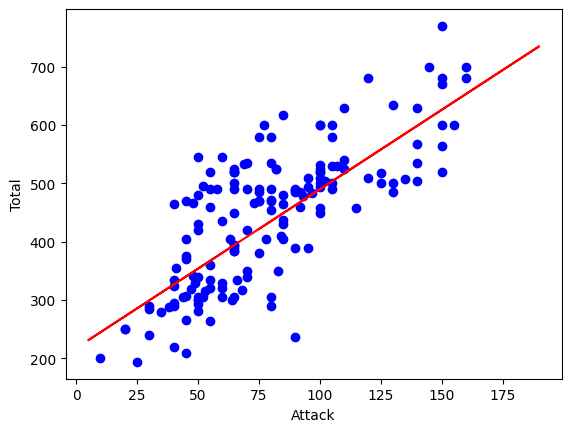

In [18]:
# visualize our model
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, regressionM.coef_ * X_train + regressionM.intercept_, '-r') 
plt.xlabel("Attack")
plt.ylabel("Total")


In [19]:
X = cdf["Sp. Atk"].to_numpy()
y = cdf.Total.to_numpy()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% test size/ 80% train size

In [21]:
regressionMspAtk = linear_model.LinearRegression()

In [22]:
regressionMspAtk.fit(X_train.reshape(-1, 1), y_train) 

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Text(0, 0.5, 'Total')

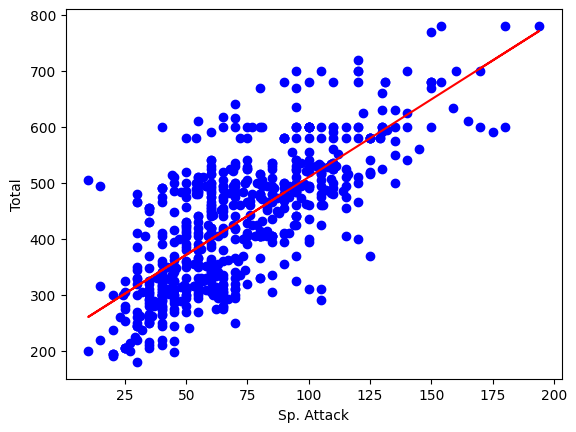

In [23]:
# visualize our model
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressionMspAtk.coef_ * X_train + regressionMspAtk.intercept_, '-r') 
plt.xlabel("Sp. Attack")
plt.ylabel("Total")

In [24]:
y_pred = regressionMspAtk.predict(X_test.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 5686.310792908523
Mean Absolute Error: 60.77895430421478
R^2 Score: 0.5865368762329851
